# Analyze A/B Test Results 


- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

This is a project to show the results of A/B testing for an e-commerce website to help determine whether or not this company should implement a new webpage, keep their current page, or continue their experiment before making their final decision. 



<a id='probability'></a>
## Part I - Probability



In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
# 11.96% of users conveted

df.converted.value_counts() / len(df)

0    0.880341
1    0.119659
Name: converted, dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# The "Treatment" group was on the old page 1965 times

df.query('group == "treatment" and landing_page != "new_page"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [7]:
# No values are missing from this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df_control = df.query('group == "control" and landing_page == "old_page"')
df_treatment = df.query('group == "treatment" and landing_page == "new_page"')
df2 = pd.concat([df_control, df_treatment])

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [10]:
# There are 290,584 unique user id's

df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# The duplicate user is 773,192

duplicate_user = df2[df2['user_id'].duplicated()].user_id
duplicate_user

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
df2.drop(2893, inplace=True)

In [14]:
# No more duplicated user_id's
df2['user_id'].duplicated().value_counts()

False    290584
Name: user_id, dtype: int64

### ToDo 1.4  
**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [15]:
# Overall conversion probability is 11.96%

convert_prob = df2['converted'].sum() / len(df2)
convert_prob

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Control groups conversion probability is 12.04%

control_group = df2.query('group == "control"')
control_prob = control_group['converted'].sum() / len(control_group)
control_prob


0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# Treatment groups conversion probability is 11.88%

treatment_group = df2.query('group == "treatment"')
treatment_prob = treatment_group['converted'].sum() / len(treatment_group)
treatment_prob


0.11880806551510564

In [18]:
# The actual difference (obs_diff) between the conversion rates for the two groups is -0.0015.
obs_diff = treatment_prob - control_prob
obs_diff


-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [19]:
# An individual has a 50.6% chance of receiving the new page

df[df['landing_page'] == 'new_page']['group'].count()/len(df2)

0.50670030008534539

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>The data suggests that the treatment group has a slightly smaller conversion rate when compared to the overall the control convertion rate.
- Treatment Group Converstion Rate: 11.88%
- Control Group Conversion Rage: 12.04%


<a id='ab_test'></a>
## Part II - A/B Test


>$$H_0: p_{old} - p_{new} >= 0$$


$$H_1: p_{old} - p_{new} < 0$$


$p_{old}$ and $p_{new}$ represent the conversion rates for the old and new pages.

### ToDo 2.2 - Null Hypothesis $H_0$ Testing

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [22]:
n_new = treatment_group.count().user_id
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = control_group.count().user_id
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>



In [24]:
# Simulate a Sample for the treatment Group. 

new_page_converted = np.random.choice([1,0], size=n_new, replace=True, p=(p_new, 1-p_new))
p_new_cr_null = new_page_converted.mean()
p_new_cr_null

0.12054917073842131

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [25]:
# Simulate a Sample for the control Group

old_page_converted = np.random.choice([1,0], size=n_old, replace=True, p=(p_old, 1-p_old))
p_old_cr_null = old_page_converted.mean()

p_old_cr_null

0.11918856780979391

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
samp_diffs = p_new_cr_null - p_old_cr_null
samp_diffs

0.0013606029286273996


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution 
new_means = []
old_means = []
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, replace=True, p=(p_new, 1-p_new))
    old_page_converted = np.random.choice([1,0], size=n_old, replace=True, p=(p_old, 1-p_old))
    
    new_mean = new_page_converted.mean()
    old_mean = old_page_converted.mean()
    
    new_means.append(new_mean)
    old_means.append(old_mean)
    
    p_diffs.append(new_mean - old_mean)
    
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



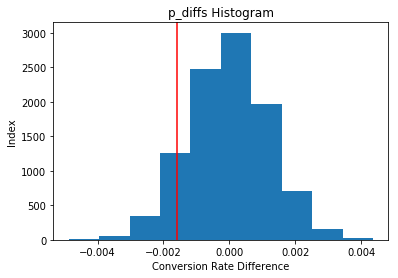

In [28]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.title('p_diffs Histogram')
plt.xlabel('Conversion Rate Difference')
plt.ylabel("Index");

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
# 90% of the simulated differences are greater than the observed differences.

(p_diffs > obs_diff).mean()

0.90659999999999996

**k.** 
- 0.9052 is the p-value. 
- The p_value tells us that, assuming the null is true, that there is a 90.5% of observing the conversion difference. Compared to the Type I error rate of 0.05, we can safely say there is not enough evidence to reject the null hypothesis.



**l. Using Built-in Methods for Hypothesis Testing**<br>



In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum(control_group['converted'] == 1)

# number of conversions with the new_page
convert_new = sum(treatment_group['converted'] == 1)

# number of individuals who were shown the old_page
n_old = n_old

# number of individuals who received new_page
n_new = n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** 

In [46]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)




1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



> Both the p_value and the z-score indicate tha we do not have enough evidene to reject the null. 

> The p-value of 0.905 is similar to our other test and well above the type 1 threshold of 0.05. 
> The z-score represents a 1.3 standard deviation from the mean. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 


**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic Regression as the data is binary. 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:


In [32]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [33]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-19 19:26 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


> The p_value of the ab_page is 0.1899, which tells me that our null cannot be rejected because it is higher than the error threshold of 0.05.
> While both tests have the same conclusion, the values are different due to the two-tailed test we performed for the logistic regression. 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Change aversion could be a reason for existing customers to not convert on the new page. Alternatively you oculd see more customers converting based on a novelty affect. 

> Adding additional terms into a regression model has the potental to strengthen the correlation coefficient but needs to be thoroughly vetted to ensure there isn't any issues such as multicollinearity.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [35]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
# Join with the df2 dataframe
df_merged = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
df_merged['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [56]:
# Getting dummy variables for the countries
df_merged[['US', 'UK', 'CA']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,UK_AB,CA_AB
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [62]:
log_mod1 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'CA']])
results1 = log_mod1.fit()
results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-19 20:22 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

> This model shows the values as insignificant and the null cannot be rejected.

**h. Fit your model and obtain the results**Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion. Create the necessary additional columns, and fit the new model.


In [52]:
uk_ab = df_merged['UK']*df_merged['ab_page']
df_merged['UK_AB'] = uk_ab

In [53]:
ca_ab = df_merged['CA']*df_merged['ab_page']
df_merged['CA_AB'] = ca_ab

In [63]:
log_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page', 'UK_AB', 'UK', 'CA_AB', 'CA']])
results2 = log_mod.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-19 20:23 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK_AB          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA_AB          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
==================================================================

"""

> After creating an interaction between the ab_page and CA/UK we can see that the p_values are still greater than 0.05 which suggests that we don't have enough evidence to reject the null. 

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0